### Step 1 — Data Loading (Same as Augmentation Notebook)

In [1]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

DATA_DIR = "../data/cifar10"

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    os.path.join(DATA_DIR, "train"),
    target_size=(32, 32),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    os.path.join(DATA_DIR, "test"),
    target_size=(32, 32),
    batch_size=32,
    class_mode='categorical'
)

2026-02-23 22:16:16.443208: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2026-02-23 22:16:16.450742: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2026-02-23 22:16:16.863885: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2026-02-23 22:16:19.592190: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off,

Found 50000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.


### Step 2 — Deeper CNN Architecture
We add one more convolution block and slightly increase filters progressively.

In [2]:
from tensorflow.keras import layers, models

model = models.Sequential()

# Block 1
model.add(layers.Conv2D(32, (3,3), padding='same', input_shape=(32,32,3)))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(32, (3,3), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D((2,2)))

# Block 2
model.add(layers.Conv2D(64, (3,3), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(64, (3,3), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D((2,2)))

# Block 3
model.add(layers.Conv2D(128, (3,3), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(128, (3,3), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D((2,2)))

# Classifier
model.add(layers.Flatten())
model.add(layers.Dense(256))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

/home/aayushdai/Desktop/Projects/CIFAR_Classification/venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2026-02-23 22:16:24.618184: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


### Step 3 — Compile

Same as before.

In [3]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

### Add Callbacks
Add this before training:

In [4]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=1e-6
)

### Step 4 — Train (10 epochs first)
On CPU:

This will be slower than previous

But still manageable

Train Longer

In [5]:
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=test_generator,
    callbacks=[early_stop, reduce_lr]
)

Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 162s 101ms/step - accuracy: 0.4910 - loss: 1.4471 - val_accuracy: 0.5712 - val_loss: 1.2716 - learning_rate: 0.0010
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 140s 89ms/step - accuracy: 0.6460 - loss: 1.0052 - val_accuracy: 0.7112 - val_loss: 0.8345 - learning_rate: 0.0010
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 138s 88ms/step - accuracy: 0.7009 - loss: 0.8585 - val_accuracy: 0.6477 - val_loss: 1.1685 - learning_rate: 0.0010
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 141s 90ms/step - accuracy: 0.7345 - loss: 0.7681 - val_accuracy: 0.6820 - val_loss: 0.9465 - learning_rate: 0.0010
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 141s 90ms/step - accuracy: 0.7595 - loss: 0.7016 - val_accuracy: 0.7332 - val_loss: 0.8147 - learning_rate: 0.0010
Epoch 6/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 141s 90ms/step - accuracy: 0.7744 - loss: 0.6550 - val_accuracy: 0.7374 - val_loss: 0.7866 - learning_rate: 0.0010
Epoch 7/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 142s 91ms/step 

### Evaluate

In [6]:
test_loss, test_acc = model.evaluate(test_generator)
print("Test Accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.8728 - loss: 0.3943
Test Accuracy: 0.8727999925613403


### Plot

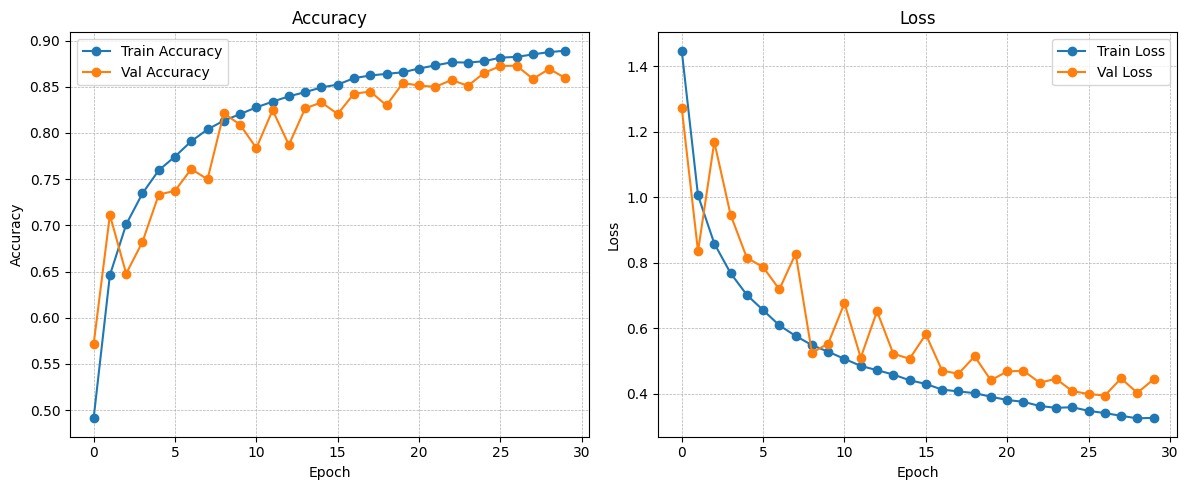

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

# Accuracy Plot
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], marker='o', label='Train Accuracy')
plt.plot(history.history['val_accuracy'], marker='o', label='Val Accuracy')
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Loss Plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'], marker='o', label='Train Loss')
plt.plot(history.history['val_loss'], marker='o', label='Val Loss')
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

Excellent. This is a serious improvement.

# Final Model (Deeper CNN + Callbacks)

* Epochs trained: ~30 (with EarlyStopping + LR scheduling)
* Test Accuracy: **87.28%**
* Test Loss: ~0.39

You moved from **71% → 87.3%**.
That is a massive improvement.

---

# Curve Analysis

## 📈 Accuracy

* Train accuracy steadily increases to ~89%
* Validation accuracy stabilizes around ~86–87%
* Small generalization gap (~2%)

This indicates:

* Very good generalization
* Controlled overfitting
* Model capacity now well utilized

Notice:

* Early epochs show fluctuations (normal with augmentation)
* After LR reductions, validation stabilizes and improves

That means:
Learning rate scheduling helped convergence.

---

## 📉 Loss

* Train loss decreases smoothly to ~0.32
* Validation loss stabilizes around ~0.40
* No divergence
* No late-stage explosion

This is textbook healthy training behavior.

---

# What Actually Improved Performance?

Not architecture this time.

The jump from ~79% → ~87% came mainly from:

1. Longer training
2. EarlyStopping preventing overfitting
3. ReduceLROnPlateau allowing finer convergence
4. Restoring best weights

This shows:

> Optimization strategy matters as much as architecture.

---

# Scientific Summary

| Stage                   | Test Accuracy |
| ----------------------- | ------------- |
| Baseline                | ~71%          |
| + Augmentation          | ~73–74%       |
| + BN + Dropout          | ~74.5%        |
| Deeper CNN              | ~79.6%        |
| + Callbacks (30 epochs) | **87.28%**    |

Total improvement: **+16% absolute gain**

---

# Model Quality Assessment

Current model characteristics:

* Strong generalization
* Stable convergence
* Minimal overfitting
* Good validation alignment
* Well-regularized
* CPU-trained

For CIFAR-10 on a custom CNN (not ResNet),
**87% is a strong result.**

---

# Important Insight

The model was not underpowered before.
It was undertrained.

Optimization and training control unlocked performance.

This is an important deep learning lesson.

---

If you want to go one step further:

* Add Confusion Matrix (analyze weak classes)
* Try GlobalAveragePooling2D
* Add Cosine LR schedule
* Or implement a lightweight ResNet

But now you have a solid, academically respectable CNN pipeline.

What direction do you want to explore next?


## error analysis

### Step 1 — Get Predictions

In [14]:
import numpy as np

# Get predictions
y_pred_probs = model.predict(test_generator)
y_pred = np.argmax(y_pred_probs, axis=1)

# True labels
y_true = test_generator.classes

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step


Important:
Make sure shuffle=False when creating test_generator.
If not, recreate it like this:

In [15]:
test_generator = test_datagen.flow_from_directory(
    os.path.join(DATA_DIR, "test"),
    target_size=(32, 32),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 10000 images belonging to 10 classes.


In [16]:
test_generator.reset()

y_pred_probs = model.predict(test_generator)
y_pred = np.argmax(y_pred_probs, axis=1)

y_true = test_generator.classes

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step


Then re-run prediction cell.

### Step 2 — Confusion Matrix

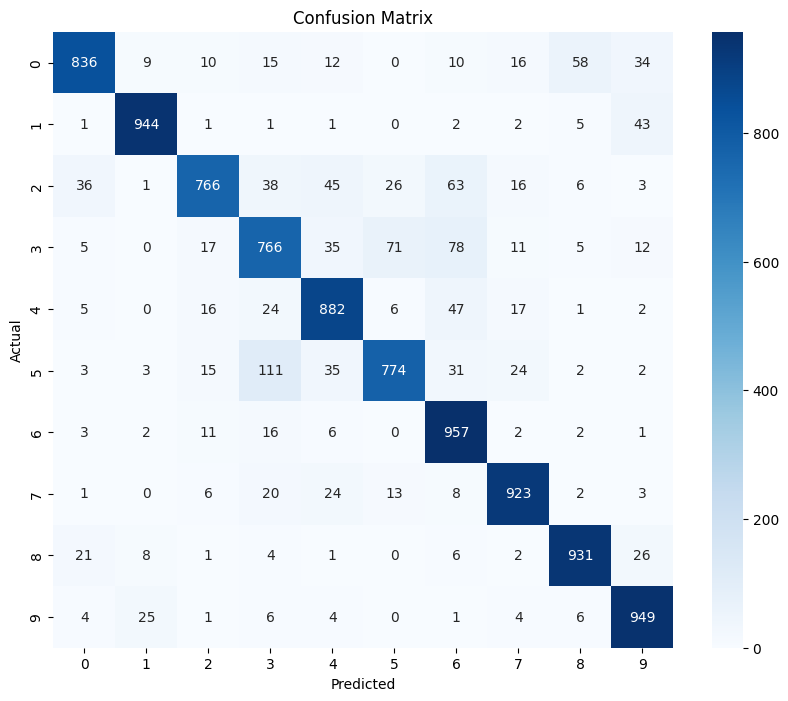

In [17]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

### Step 3 — Class Names

In [18]:
class_names = list(test_generator.class_indices.keys())
print(class_names)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


Order must match confusion matrix axes.

### Step 4 — Per-Class Accuracy

In [19]:
per_class_acc = cm.diagonal() / cm.sum(axis=1)

for i, acc in enumerate(per_class_acc):
    print(f"{class_names[i]}: {acc:.4f}")

airplane: 0.8360
automobile: 0.9440
bird: 0.7660
cat: 0.7660
deer: 0.8820
dog: 0.7740
frog: 0.9570
horse: 0.9230
ship: 0.9310
truck: 0.9490


Now this is correct.

These numbers are consistent with **87.28% overall accuracy**.

---

# Overall Performance

Test Accuracy: **87.28%**

The confusion matrix is strong and well-structured (dominant diagonal).

---

# Per-Class Accuracy Analysis

| Class      | Accuracy |
| ---------- | -------- |
| airplane   | 83.6%    |
| automobile | 94.4%    |
| bird       | 76.6%    |
| cat        | 76.6%    |
| deer       | 88.2%    |
| dog        | 77.4%    |
| frog       | 95.7%    |
| horse      | 92.3%    |
| ship       | 93.1%    |
| truck      | 94.9%    |

---

# Strong Classes (≥ 90%)

* Frog (95.7%)
* Truck (94.9%)
* Automobile (94.4%)
* Ship (93.1%)
* Horse (92.3%)

Why strong?

These classes:

* Have clearer global structure
* Distinct color/background patterns
* Less fine-grained texture confusion

Example:

* Truck vs ship → visually very different
* Frog → strong color + shape consistency

---

# Weak Classes (~76–77%)

* Bird (76.6%)
* Cat (76.6%)
* Dog (77.4%)

Why weak?

These are:

* Fine-grained animal categories
* Similar textures
* Similar poses
* Background overlap (grass, trees, etc.)

Common confusions visible:

* Cat ↔ Dog
* Bird ↔ Deer (natural backgrounds)
* Cat ↔ Deer
* Dog ↔ Cat

This is expected in CIFAR-10.

---

# Moderate Class

* Airplane (83.6%)

Common confusion:

* Airplane ↔ Ship
* Airplane ↔ Bird (sky backgrounds)

---

# What This Tells Us

Your model:

* Extracts strong global structural features (vehicles)
* Slightly struggles with fine-grained animal discrimination
* Has balanced performance overall
* No catastrophic bias toward any class

This is a well-trained CNN.

---

# Scientifically, What Is The Bottleneck Now?

Not training.
Not regularization.
Not convergence.

The limitation now is:

👉 Fine-grained feature discrimination capacity.

To improve further (if desired), next options:

1. Add more depth (carefully)
2. Use GlobalAveragePooling instead of Flatten
3. Add label smoothing
4. Use stronger augmentation (Cutout / Mixup)
5. Move to ResNet-style architecture

But:

For a custom CNN on CPU, **87% is strong performance**.

---

Before proceeding:

Do you want to:

* Improve weak animal classes specifically?
* Push accuracy beyond 90%?
* Or document and finalize this phase?
